In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
# based largely on on http://alexanderfabisch.github.io/t-sne-in-scikit-learn.html

import glob


# Guh fine, I think this is annoying
%pylab inline



Populating the interactive namespace from numpy and matplotlib


In [20]:
email_lines = []
# email_lines.extend([3,1,1])
for filename in glob.glob('ScottPruittEmails//*.txt'):
    # print(filename)
    emails_file = open(filename)
    emails = emails_file.read()
    # email_lines = emails.split('\n\n')
    split_emails = emails.split('From:')
    # print( len(split_emails))
    split_emails = list(map(lambda x: 'From:'+x, split_emails))
    email_lines.extend(split_emails)
len(email_lines)

6003

In [21]:
# single_line_filter(email_lines[].split('\n'))

temp = [k for k in email_lines if len(k) > 5]
temp = [k for k in temp if k.count(" ") > 5]
email_lines = temp
len(email_lines)

5995

In [22]:
tfidv = TfidfVectorizer()
vectors = tfidv.fit_transform(email_lines)

In [23]:
# print(repr(vectors))
# tfidv.get_feature_names()
len(email_lines)

5995

In [24]:
from sklearn.decomposition import TruncatedSVD
X_reduced = TruncatedSVD(n_components=50, random_state=0).fit_transform(vectors)

In [25]:

X_embedded = TSNE(n_components=3, perplexity=40, verbose=2).fit_transform(X_reduced)
# X_embedded = TSNE(n_components=2, perplexity=40, verbose=2).fit_transform(X_reduced)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 5995
[t-SNE] Computed conditional probabilities for sample 2000 / 5995
[t-SNE] Computed conditional probabilities for sample 3000 / 5995
[t-SNE] Computed conditional probabilities for sample 4000 / 5995
[t-SNE] Computed conditional probabilities for sample 5000 / 5995
[t-SNE] Computed conditional probabilities for sample 5995 / 5995
[t-SNE] Mean sigma: 0.105461
[t-SNE] Iteration 25: error = 1.5624061, gradient norm = 0.0064574
[t-SNE] Iteration 50: error = 1.5037284, gradient norm = 0.0043363
[t-SNE] Iteration 75: error = 1.2483906, gradient norm = 0.0015601
[t-SNE] Iteration 100: error = 1.1938701, gradient norm = 0.0012563
[t-SNE] Error after 100 iterations with early exaggeration: 1.193870
[t-SNE] Iteration 125: error = 1.1042075, gradient norm = 0.0012397
[t-SNE] Iteration 150: error = 1.0768834, gradient norm = 0.0010345
[t-SNE] Iteration 

In [26]:
X_embedded_as_list = X_embedded.tolist()
X_embedded[0]


array([-7.63703424,  0.2945387 , -4.87120337])

In [27]:
wrap_at = 60 #30
from textwrap import wrap
def add_breaks(t):
    return "\n".join(wrap(t, wrap_at))

# add_breaks(email_lines[0])
email_lines_with_breaks = [add_breaks(e) for e in email_lines]
# email_lines_with_breaks[0]


In [28]:
# from pylab import rcParams
# rcParams['figure.figsize'] = 15, 15

cmap=plt.get_cmap('viridis')

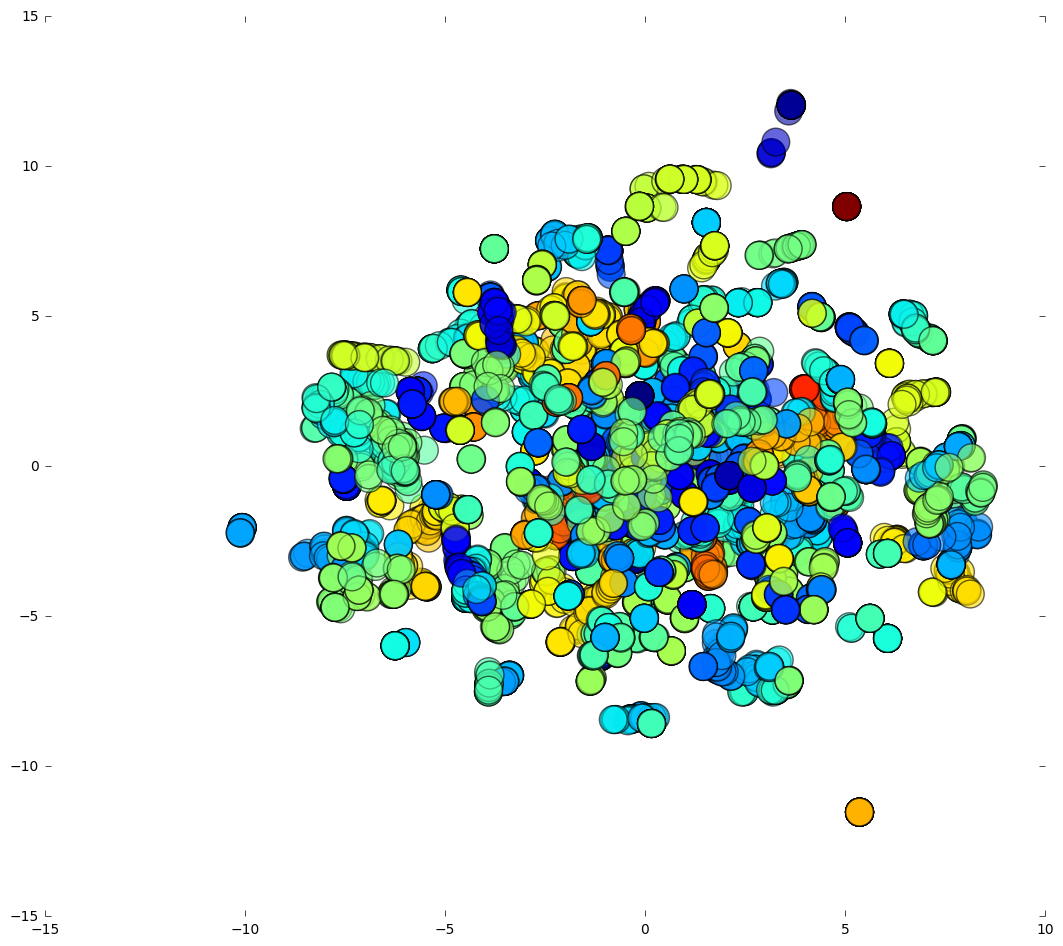

In [29]:
fig = figure(figsize=(10, 10))
# fig = figure(figsize=(100, 100))
# fig = figure(figsize=(20, 20))

ax = axes(frameon=False)
# setp(ax, xticks=(), yticks=())

subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=0.9, wspace=0.0, hspace=0.0)
scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], s=400, alpha=0.6)

# scatter(X_embedded[:, 0], X_embedded[:, 1], c=X_embedded[:, 2], s=5000, alpha=0.01, lw=0)

# plt.axis([-10, 10, -10, 10])

# for text version!
# for i, txt in enumerate(email_lines_with_breaks):
#     ax.annotate(txt, (X_embedded[i][0], X_embedded[i][1]), size=6, wrap=True, ha="center", va="center", alpha=0.9,)
#     bbox={'facecolor': 'white', 'alpha': 0.01}).set_zorder(0)
    
#                 bbox={'alpha': 0.2, 'boxstyle':'round' })
#                 bbox={'facecolor':X_embedded[i][2], 'pad':1, 'alpha': 0.2, 'boxstyle':'round' })

# Audio(url=sound_file, autoplay=True)

In [30]:
data = {"X_embedded":X_embedded_as_list, "email_lines":email_lines}
import json
with open('email_plot_data_3.json', 'w') as fp:
    json.dump(data, fp)